### Next word prediction using LSTM

https://thecleverprogrammer.com/2020/07/20/next-word-prediction-model/

In [1]:
# Using tensorflow version 2.10.1
import tensorflow
tensorflow.__version__

'2.10.1'

In [79]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pickle
import heapq

In [3]:
# Reading the text file and checking its length
PATH = r"C:\Users\Aman\Data science course\Deep Learning\1661-0.txt"
text = open(PATH, encoding='utf-8').read().lower()
print("Length of the text", len(text))

Length of the text 581888


In [4]:
# Now spliting the dataset into each word in order but without the presence of some special characters.
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [5]:
len(words)

109226

In [6]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [7]:
WORD_LENGTH = 7
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures', 'of', 'sherlock']
holmes


In [8]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [9]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Dropout(0.2))
model.add(Activation('softmax'))

In [10]:
optimizer = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

Epoch 1/10
811/811 [==============================] - 96s 116ms/step - loss: 6.7392 - accuracy: 0.0834 - val_loss: 6.8649 - val_accuracy: 0.1027
Epoch 2/10
811/811 [==============================] - 98s 121ms/step - loss: 5.9691 - accuracy: 0.1373 - val_loss: 6.8381 - val_accuracy: 0.1135
Epoch 3/10
811/811 [==============================] - 99s 122ms/step - loss: 5.4543 - accuracy: 0.1794 - val_loss: 6.9070 - val_accuracy: 0.1205
Epoch 4/10
811/811 [==============================] - 99s 122ms/step - loss: 4.9172 - accuracy: 0.2355 - val_loss: 7.0524 - val_accuracy: 0.1152
Epoch 5/10
811/811 [==============================] - 99s 122ms/step - loss: 4.3722 - accuracy: 0.3104 - val_loss: 7.2309 - val_accuracy: 0.1095
Epoch 6/10
811/811 [==============================] - 99s 123ms/step - loss: 3.8647 - accuracy: 0.3923 - val_loss: 7.5762 - val_accuracy: 0.1097
Epoch 7/10
811/811 [==============================] - 100s 124ms/step - loss: 3.4082 - accuracy: 0.4741 - val_loss: 7.8852 - val_a

In [85]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [12]:
history

{'loss': [6.739243507385254,
  5.9691386222839355,
  5.454279899597168,
  4.91718864440918,
  4.372166633605957,
  3.8647282123565674,
  3.4082462787628174,
  3.05328631401062,
  2.788285493850708,
  2.563668966293335],
 'accuracy': [0.08336706459522247,
  0.1372906118631363,
  0.17940784990787506,
  0.2354709953069687,
  0.3104049861431122,
  0.39233601093292236,
  0.4740550220012665,
  0.5428208112716675,
  0.5923206210136414,
  0.632809042930603],
 'val_loss': [6.864947319030762,
  6.8380632400512695,
  6.906960964202881,
  7.052440166473389,
  7.2309136390686035,
  7.576229572296143,
  7.885178089141846,
  8.214330673217773,
  8.518210411071777,
  8.763998031616211],
 'val_accuracy': [0.10272844135761261,
  0.11353231966495514,
  0.12049075216054916,
  0.1151803731918335,
  0.10950375348329544,
  0.10968687385320663,
  0.10346090793609619,
  0.09833364188671112,
  0.09650247544050217,
  0.0954037755727768]}

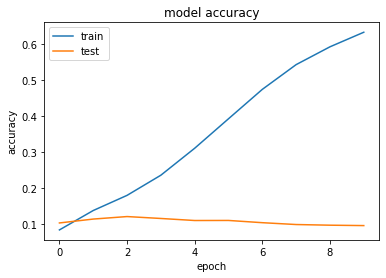

In [13]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

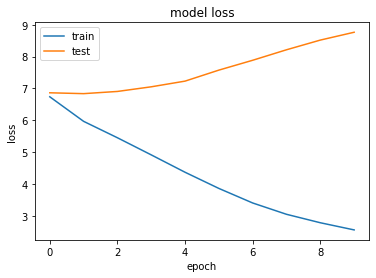

In [14]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [15]:
x = np.zeros((1, WORD_LENGTH, len(unique_words)))
x[0,4,unique_word_index["lack"]] = 1

In [16]:
WORD_LENGTH

7

In [17]:
len(unique_words)

8201

In [96]:
x = np.zeros((1, 10, 8201))

In [97]:
x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [86]:
x.shape

(1, 6, 8201)

In [87]:
mylist

[4012, 4003, 4894, 141, 4148, 4972, 4408]

In [88]:
x[0, 0, 4012] = 1

In [89]:
x[0, 0, 4012]

1.0

In [90]:
x[0, 1, 4003] = 1

In [92]:
x[0, 2, 4894]=1

In [93]:
x[0, 5, 4972]=1

In [95]:
x.shape

(1, 6, 8201)

In [98]:
x[0, 6, 4408]=1

In [62]:
words=seq.split()
for t, word in enumerate(words):
        print(t,word)

0 it
1 is
2 not
3 a
4 lack
5 of
6 love
7 but
8 a
9 lack
10 of
11 f


In [22]:
unique_word_index["it"]

4012

In [72]:
mylist=[]
for t, word in enumerate(words):
    print(t, word)
    mylist.append(unique_word_index[word])
    x[0, t, unique_word_index[word]] = 1

0 it
1 is
2 not
3 a
4 lack
5 of
6 love


IndexError: index 6 is out of bounds for axis 1 with size 6

In [73]:
x.shape

(1, 6, 8201)

In [74]:
mylist

[4012, 4003, 4894, 141, 4148, 4972, 4408]

In [75]:
x[0,0,4012]

1.0

In [76]:
x[0,7,5014]

IndexError: index 7 is out of bounds for axis 1 with size 6

In [77]:
mylist

[4012, 4003, 4894, 141, 4148, 4972, 4408]

In [78]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    words=text.split()
    for t, word in enumerate(words):
        print(t, word)
        x[0, t, unique_word_index[word]] = 1
        
    return x
prepare_input("It is not a lack".lower())

0 it
1 is
2 not
3 a
4 lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [54]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [55]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [56]:
predict_completion(seq)

0 it
1 is
2 not
3 a
4 lack
5 of
6 love
7 but


IndexError: index 7 is out of bounds for axis 1 with size 7

In [57]:
seq

'it is not a lack of love but a lack of f'

In [58]:
quotes = [
    "It is not a lack of love but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [59]:
for q in quotes:
    seq = q[:30].lower()

In [60]:
seq

'it is hard enough to remember '

In [61]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completion(seq, 5))
    print()

it is not a lack of love but a lack of f


TypeError: predict_completion() takes 1 positional argument but 2 were given

In [80]:
    from tensorflow.python.client import device_lib
    print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6492483936972316038
xla_global_id: -1
]


In [84]:
!NVIDIA-SMI

Sun Jan 15 18:34:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8     1W /  N/A |     44MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------